In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [29]:
ativos = ['AZUL4.SA', 'GOLL4.SA','ELET3.SA','USIM5.SA', 'ELET6.SA', 'GOAU4.SA','EMBR3.SA', 'COGN3.SA',
         'PETR4.SA', 'PETR3.SA']
new_data = pd.DataFrame()
for ativo in ativos:
    new_data[ativo] = wb.DataReader(ativo, data_source='yahoo', start='1995-1-1')['Adj Close']

In [30]:
new_data.head()

,AZUL4.SA,GOLL4.SA,ELET3.SA,USIM5.SA,ELET6.SA,GOAU4.SA,EMBR3.SA,COGN3.SA,PETR4.SA,PETR3.SA
Date,,,,,,,,,,
2017-04-11,22.400000,10.30,15.334882,3.886564,18.003880,4.096349,16.461004,12.770795,13.619681,14.851231
2017-04-12,22.959999,9.88,15.490725,3.710346,17.800594,3.926061,16.294737,12.854938,13.591848,14.792800
2017-04-13,22.990000,9.64,14.916251,3.622238,17.340998,3.916600,15.453588,12.649259,13.063019,14.130582
2017-04-17,22.850000,9.98,15.120696,3.906143,17.588472,4.058506,15.766574,13.144757,13.248573,14.266919
2017-04-18,23.910000,10.16,15.188877,3.876774,17.482412,3.878758,15.482932,13.228898,13.081574,14.081887


In [35]:

returns_daily = new_data.pct_change()

returns_annual = returns_daily.mean() * 250

returns_daily.head()

,AZUL4.SA,GOLL4.SA,ELET3.SA,USIM5.SA,ELET6.SA,GOAU4.SA,EMBR3.SA,COGN3.SA,PETR4.SA,PETR3.SA
Date,,,,,,,,,,
2017-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-12,0.025000,-0.040777,0.010163,-0.045340,-0.011291,-0.041571,-0.010101,0.006589,-0.002044,-0.003934
2017-04-13,0.001307,-0.024291,-0.037085,-0.023747,-0.025819,-0.002410,-0.051621,-0.016000,-0.038908,-0.044766
2017-04-17,-0.006090,0.035270,0.013706,0.078378,0.014271,0.036232,0.020253,0.039172,0.014205,0.009648
2017-04-18,0.046389,0.018036,0.004509,-0.007519,-0.006030,-0.044289,-0.017990,0.006401,-0.012605,-0.012969


In [27]:
PG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6354 entries, 1995-01-03 to 2020-03-27
Data columns (total 6 columns):
High         6354 non-null float64
Low          6354 non-null float64
Open         6354 non-null float64
Close        6354 non-null float64
Volume       6354 non-null float64
Adj Close    6354 non-null float64
dtypes: float64(6)
memory usage: 347.5 KB


In [36]:
cov_daily = returns_daily.cov()

cov_annual = cov_daily * 250
cov_annual

,AZUL4.SA,GOLL4.SA,ELET3.SA,USIM5.SA,ELET6.SA,GOAU4.SA,EMBR3.SA,COGN3.SA,PETR4.SA,PETR3.SA
AZUL4.SA,0.362507,0.359390,0.195331,0.172597,0.177198,0.156175,0.122483,0.171613,0.184201,0.183595
GOLL4.SA,0.359390,0.532826,0.243402,0.222080,0.222258,0.186377,0.132721,0.196184,0.211433,0.202639
ELET3.SA,0.195331,0.243402,0.490827,0.189239,0.389519,0.162890,0.106637,0.143365,0.191065,0.182620
USIM5.SA,0.172597,0.222080,0.189239,0.304390,0.171013,0.201138,0.096104,0.133710,0.164864,0.158536
ELET6.SA,0.177198,0.222258,0.389519,0.171013,0.361141,0.141360,0.096142,0.129434,0.171842,0.164260
GOAU4.SA,0.156175,0.186377,0.162890,0.201138,0.141360,0.238332,0.091894,0.127089,0.161027,0.155300
EMBR3.SA,0.122483,0.132721,0.106637,0.096104,0.096142,0.091894,0.190066,0.089649,0.103157,0.111988
COGN3.SA,0.171613,0.196184,0.143365,0.133710,0.129434,0.127089,0.089649,0.260652,0.124215,0.120004
PETR4.SA,0.184201,0.211433,0.191065,0.164864,0.171842,0.161027,0.103157,0.124215,0.261062,0.249287
PETR3.SA,0.183595,0.202639,0.182620,0.158536,0.164260,0.155300,0.111988,0.120004,0.249287,0.254785


In [37]:
port_returns = []

port_volatility = []

stock_weights = []

In [39]:

num_assets = len(ativos)

num_portfolios = 200000

In [42]:
for single_portfolio in range(num_portfolios):

    weights = np.random.random(num_assets)

    weights /= np.sum(weights)

    returns = np.dot(weights, returns_annual)

    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

    port_returns.append(returns)

    port_volatility.append(volatility)

    stock_weights.append(weights)

In [43]:

portfolio = {'Retornos': port_returns,

             'Volatilidade': port_volatility}

In [45]:
for counter,symbol in enumerate(ativos):

    portfolio[symbol+' peso'] = [weight[counter] for weight in stock_weights]
    
df = pd.DataFrame(portfolio)

In [47]:

column_order = ['Retornos', 'Volatilidade'] + [stock+' peso' for stock in ativos]

df = df[column_order]

df.head()

,Retornos,Volatilidade,AZUL4.SA peso,GOLL4.SA peso,ELET3.SA peso,USIM5.SA peso,ELET6.SA peso,GOAU4.SA peso,EMBR3.SA peso,COGN3.SA peso,PETR4.SA peso,PETR3.SA peso
0,0.181264,0.451338,0.123449,0.103671,0.175686,0.161735,0.098444,0.019805,0.097057,0.059210,0.029050,0.131894
1,0.124297,0.421931,0.095017,0.127643,0.008334,0.043830,0.089164,0.129805,0.162200,0.057908,0.118097,0.168002
2,0.166270,0.441126,0.045182,0.173808,0.159510,0.140132,0.021628,0.054688,0.162535,0.040105,0.010108,0.192305
3,0.174903,0.445249,0.019895,0.091694,0.177789,0.139007,0.123412,0.060052,0.075096,0.096054,0.092474,0.124527
4,0.207785,0.459343,0.044981,0.004343,0.183273,0.183853,0.193852,0.142096,0.008255,0.043170,0.090328,0.105850


In [48]:
retornos = df.sort_values(by=['Retornos'], ascending=False)

retornos.head(5)

,Retornos,Volatilidade,AZUL4.SA peso,GOLL4.SA peso,ELET3.SA peso,USIM5.SA peso,ELET6.SA peso,GOAU4.SA peso,EMBR3.SA peso,COGN3.SA peso,PETR4.SA peso,PETR3.SA peso
133752,0.275570,0.517739,0.011601,0.363928,0.002195,0.145543,0.356985,0.021166,0.005175,0.011840,0.034399,0.047170
176897,0.270701,0.522682,0.040330,0.183406,0.244144,0.074023,0.320186,0.046112,0.007086,0.027969,0.001807,0.054937
14820,0.269918,0.498420,0.028982,0.211880,0.189344,0.218362,0.195376,0.124796,0.002158,0.015398,0.005445,0.008260
181670,0.265726,0.506291,0.042627,0.246960,0.285051,0.120708,0.091367,0.077388,0.028642,0.006598,0.074318,0.026342
150828,0.265322,0.501975,0.030482,0.202300,0.218218,0.240378,0.184056,0.028743,0.008867,0.027684,0.032201,0.027071


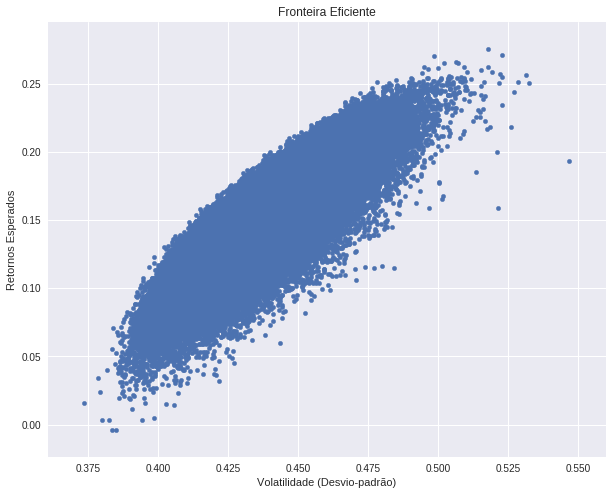

In [52]:
plt.style.use('seaborn')

df.plot.scatter(x='Volatilidade', y='Retornos', figsize=(10, 8), grid=True)

plt.xlabel('Volatilidade (Desvio-padrão)')

plt.ylabel('Retornos Esperados')

plt.title('Fronteira Eficiente')

plt.show();